In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("yahoo_stock.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [3]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
df.dtypes


Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

<AxesSubplot:>

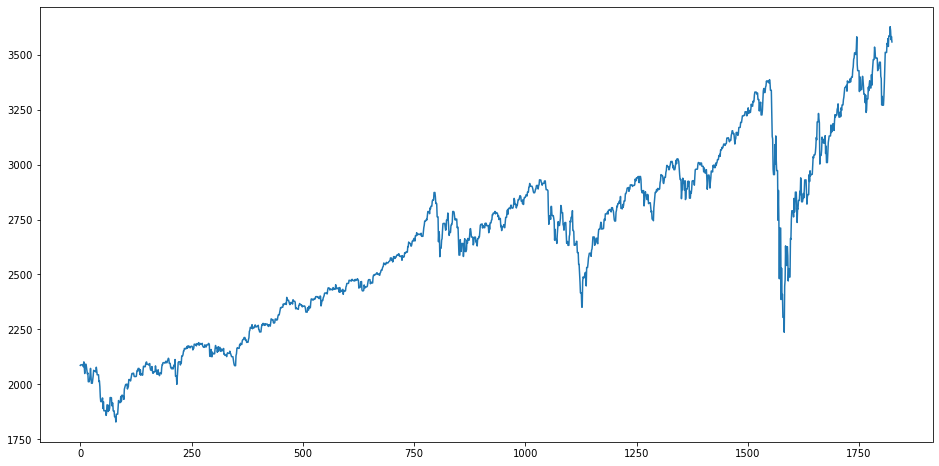

In [5]:
plt.figure(figsize=(16,8))
df["Adj Close"].plot()


In [6]:
df["Date"]=pd.to_datetime(df["Date"])
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [7]:
df.set_index("Date",inplace=True)

In [8]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_=adfuller(df["Adj Close"])

In [9]:
pvalue

0.7975646340657487

In [10]:
df["year"]=[d.year for d in df.index]
df["day"]=[d.day for d in df.index]

df["month"]=[d.strftime('%b') for d in df.index]
df

,High,Low,Open,Close,Volume,Adj Close,year,day,month
Date,,,,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2015,23,Nov
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2015,24,Nov
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,25,Nov
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,26,Nov
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2015,27,Nov
...,...,...,...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,2020,16,Nov
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,2020,17,Nov
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,2020,18,Nov


<AxesSubplot:xlabel='year', ylabel='Adj Close'>

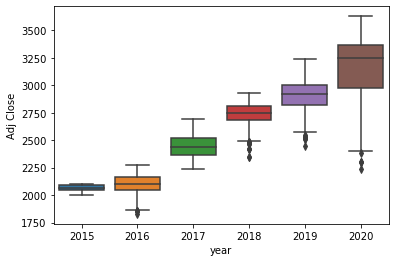

In [11]:
sns.boxplot(x='year',y='Adj Close',data=df)

<AxesSubplot:xlabel='month', ylabel='Adj Close'>

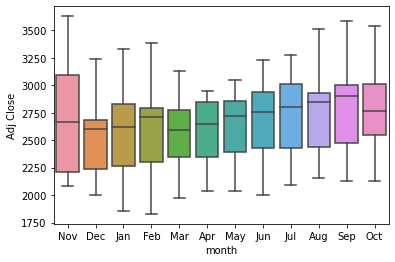

In [12]:
sns.boxplot(x='month',y='Adj Close',data=df)

<AxesSubplot:xlabel='day', ylabel='Adj Close'>

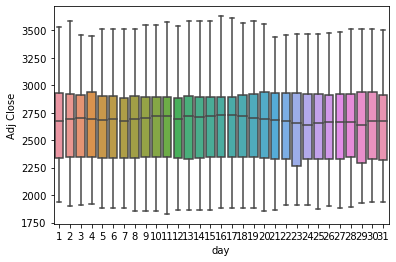

In [13]:
sns.boxplot(x='day',y='Adj Close',data=df)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(df["Adj Close"],
                             model='additive'
                             )

In [15]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

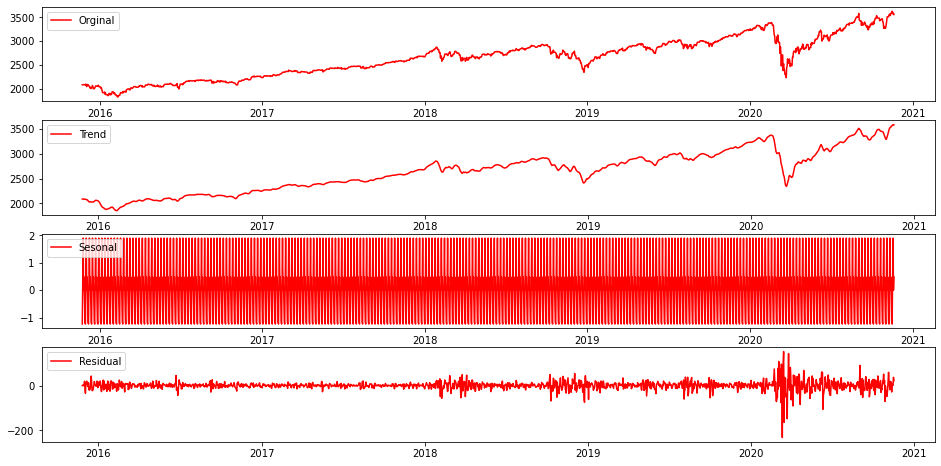

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(df["Adj Close"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [17]:
from pmdarima.arima import auto_arima

In [18]:
# arima_model=auto_arima(df["Adj Close"],start_p=1,d=1,start_q=1,
#                       max_p=5,max_q=5,max_d=5,m=30,
#                         start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
#                       seasonal=True,
#                        trace=True,
#                       error_action="ignore",
#                       suppress_warnings=True,
#                       stepwise=True)

In [19]:
# arima_model.summary()

In [20]:
size=int(len(df)*0.8)
X_train,X_test=df[0:size],df[size:len(df)]

In [21]:
X_train

,High,Low,Open,Close,Volume,Adj Close,year,day,month
Date,,,,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2015,23,Nov
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2015,24,Nov
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,25,Nov
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,26,Nov
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2015,27,Nov
...,...,...,...,...,...,...,...,...,...
2019-11-17,3120.459961,3104.600098,3107.919922,3120.459961,3.335650e+09,3120.459961,2019,17,Nov
2019-11-18,3124.169922,3112.060059,3117.909912,3122.030029,3.436690e+09,3122.030029,2019,18,Nov
2019-11-19,3127.639893,3113.469971,3127.449951,3120.179932,3.590070e+09,3120.179932,2019,19,Nov


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model=SARIMAX(X_train["Adj Close"],
             order=(1,1,1),
             seasonal_order=(3,1,0,60))
result=model.fit()
result.summary()


/home/venom/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/venom/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Adj Close   No. Observations:                 1460
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 60)   Log Likelihood               -6153.933
Date:                             Fri, 06 Aug 2021   AIC                          12319.865
Time:                                     06:38:04   BIC                          12351.326
Sample:                                 11-23-2015   HQIC                         12331.626
                                      - 11-21-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0219      0.441     -0.050      0.960      -0.887       0.843
ma.L1         -0.0271      0.441     -0.061      0.951      -0.892       0.838
ar.S.L60      -0.7540      0.021    -35.726      0.000      -0.795      -0.713
ar.S.L120     -0.5047      0.026    -19.635      0.000      -0.555      -0.454
ar.S.L180     -0.2362      0.019    -12.313      0.000      -0.274      -0.199
sigma2       375.7995      7.668     49.009      0.000     360.771     390.828
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2050.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
# train_predction

In [25]:
st_index=len(X_train)
ed_index=len(df)-1
predction=result.predict(st_index,ed_index)
# predction

In [26]:
# X_test["Adj Close"]

<AxesSubplot:xlabel='Date'>

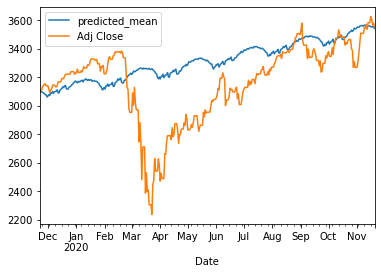

In [27]:
predction.plot(legend=True)
X_test["Adj Close"].plot(legend=True)

In [28]:
import math
from sklearn.metrics import mean_squared_error

In [29]:
trainScore=math.sqrt(mean_squared_error(X_train['Adj Close'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["Adj Close"],predction))
trainScore,testScore

(63.74645395506552, 290.37787602950885)

In [34]:
forcast=result.predict(start=len(df),
                      end=(len(df)-1)+1*365,
                      typ="levels").rename('Forecust')

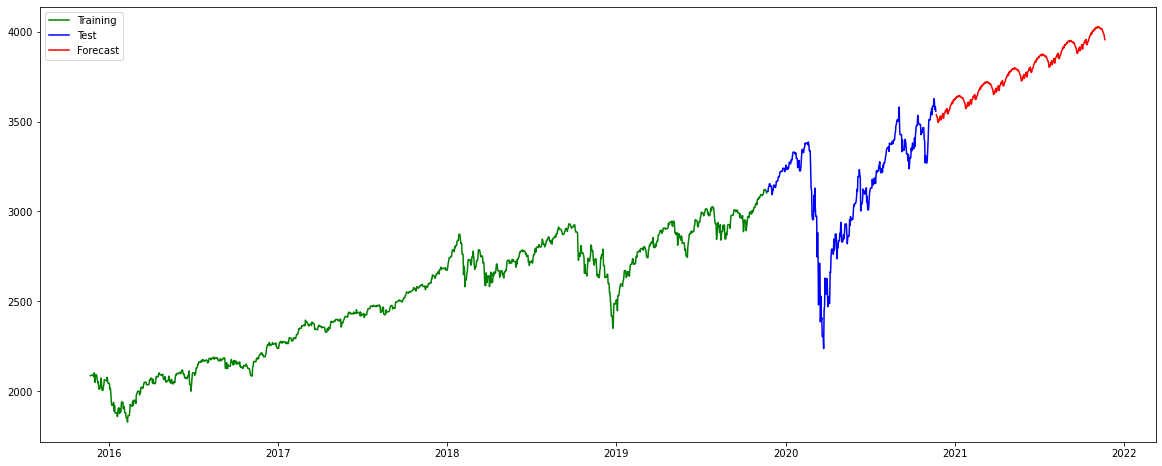

In [35]:
plt.figure(figsize=(20,8))
plt.plot(X_train["Adj Close"],label="Training",color='green')
plt.plot(X_test["Adj Close"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")
